<a href="https://colab.research.google.com/github/Mohit-480/Digit_Recognition-using-CNN/blob/main/digit_recognition_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files


Load Dataset(MNIST)

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


Training model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# ✅ Save trained model
model.save("mnist_digit_model.h5")
print("✅ Model saved successfully as mnist_digit_model.h5")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9039 - loss: 0.3229 - val_accuracy: 0.9833 - val_loss: 0.0529
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9885 - val_loss: 0.0329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9875 - val_loss: 0.0378
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9908 - val_loss: 0.0264
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9896 - val_loss: 0.0313


✅ Model saved successfully as mnist_digit_model.h5


Testing

✅ Model loaded successfully!

📤 Upload a digit image to classify...


Saving img7.webp to img7 (1).webp

✅ Uploaded: img7 (1).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


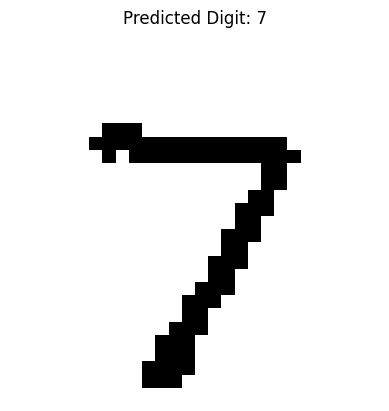

🔢 Prediction: 7


In [ ]:
model = tf.keras.models.load_model("mnist_digit_model.h5")
print("✅ Model loaded successfully!")

print("\n📤 Upload a digit image to classify...")
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\n✅ Uploaded: {filename}")

    # Read image
    img = cv2.imread(filename)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Binarize (invert if needed for MNIST style)
    _, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Resize
    img_resized = cv2.resize(thresh, (28, 28))

    # Normalize + reshape
    img_final = img_resized.astype("float32")/255.0
    img_final = img_final.reshape(1,28,28,1)

    # Predict
    pred = model.predict(img_final)
    digit = np.argmax(pred)

    # Show results
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predicted Digit: {digit}")
    plt.axis('off')
    plt.show()

    print(f"🔢 Prediction: {digit}")
